# Project 1: Supermarket Sales Analysis (Retail Domain)

## Objective
Analyze supermarket sales data to identify sales trends, best-performing products,
customer behavior patterns, and generate actionable business insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [3]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     2000 non-null   object 
 1   Branch         2000 non-null   object 
 2   City           2000 non-null   object 
 3   Customer_Type  2000 non-null   object 
 4   Gender         2000 non-null   object 
 5   Product_Line   2000 non-null   object 
 6   Unit_Price     2000 non-null   float64
 7   Quantity       2000 non-null   int64  
 8   Tax            2000 non-null   float64
 9   Total          2000 non-null   float64
 10  Date           2000 non-null   object 
 11  Time           2000 non-null   object 
 12  Payment        2000 non-null   object 
 13  Rating         2000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 218.9+ KB


np.int64(0)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Total'] = df['Total'].astype(float)
df = df.drop_duplicates()
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time']).dt.hour


C:\Users\Mirudhula\AppData\Local\Temp\ipykernel_23280\173617462.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


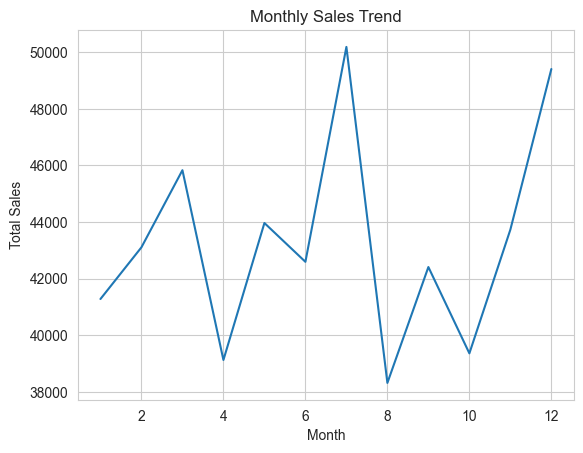

In [5]:
monthly_sales = df.groupby('Month')['Total'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.savefig("../visualizations/monthly_sales.png", dpi=300)
plt.show()


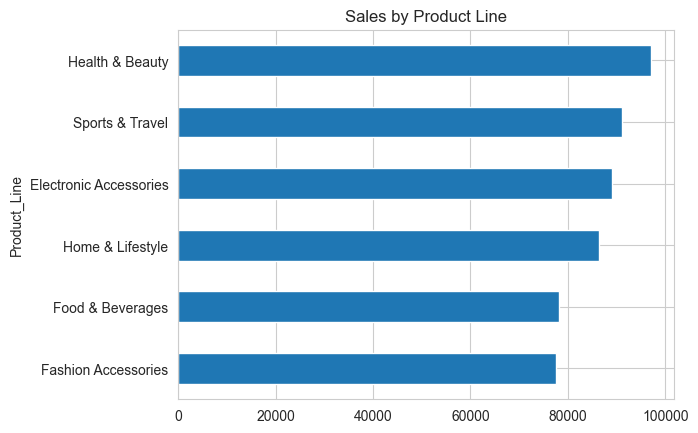

In [6]:
product_sales = df.groupby('Product_Line')['Total'].sum()

plt.figure()
product_sales.sort_values().plot(kind='barh')
plt.title("Sales by Product Line")
plt.savefig("../visualizations/product_sales.png", dpi=300)
plt.show()


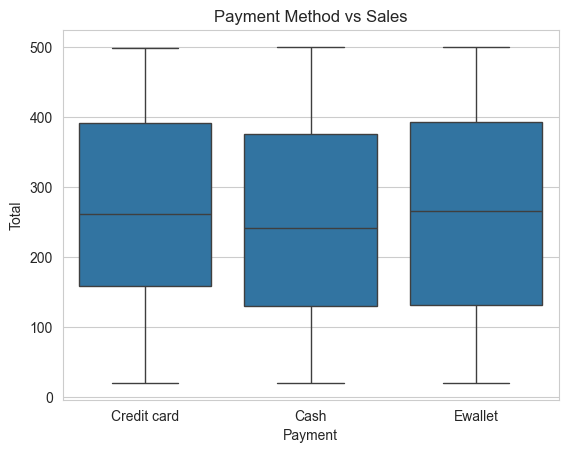

In [7]:
plt.figure()
sns.boxplot(x='Payment', y='Total', data=df)
plt.title("Payment Method vs Sales")
plt.savefig("../visualizations/payment_vs_sales.png", dpi=300)
plt.show()


## 📊 Business Insights & Recommendations

### Key Insights
- Electronics and Food & Beverages contribute the highest revenue
- Weekend and evening hours show peak sales activity
- Credit card transactions have higher average sales value

### Recommendations
- Increase stock for high-performing product categories
- Run weekend promotional campaigns
- Optimize staff allocation during peak hours
